### Load packages

In [ ]:
import scanpy as sc
import episcanpy.api as epi
import numpy as np
import anndata as ad
import random
import copy
import pandas as pd

In [2]:
sc.settings.set_figure_params(dpi=80, color_map='gist_earth')

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [4]:
# Load processed data
adata = ad.read('/home/icb/anna.danese/small_peaks_dataset_merged_dataset.h5ad')
adata

AnnData object with n_obs × n_vars = 11598 × 94088 
    obs: 'batch', 'batchname', 'filter', 'filter_barcode_cellranger', 'log_nb_features', 'nb_features', 'n_counts'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'
    layers: 'counts'

In [5]:
annot = []
index = 0
for n in adata.obs_names.tolist():
    if adata.obs['batchname'][index] == '10x Genomics':
        annot.append('10x Genomics')
    elif adata.obs['batchname'][index] =='Cusanovich et al.':
        annot.append(' - '.join(['Cusanovich et al.', 'WholeBrainA_62216']))
    elif adata.obs['batchname'][index] == 'Fang et al.':
        annot.append(' - '.join(['Fang et al.', 'CEMBA180305_2B']))
    else:
        annot.append(n)
    index += 1
    
adata.obs['batchname_all'] = annot

In [6]:
adata

AnnData object with n_obs × n_vars = 11598 × 94088 
    obs: 'batch', 'batchname', 'filter', 'filter_barcode_cellranger', 'log_nb_features', 'nb_features', 'n_counts', 'batchname_all'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'
    layers: 'counts'

In [7]:
# Load reference data for cell label transfer
adata_large = ad.read('/home/icb/anna.danese/integration_resubmission/large_dataset_merged_dataset_cell_label.h5ad')
adata_large

AnnData object with n_obs × n_vars = 84813 × 118723 
    obs: 'batch', 'batchname', 'batchname_Cusanovich', 'batchname_Fang', 'filter_barcode_cellranger', 'log_nb_features', 'nb_features', 'batchname_all', 'n_counts', 'final_cell_label'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'
    uns: 'batchname_all_colors', 'batchname_colors', 'final_cell_label_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [8]:
set(adata.obs['batchname_all'])

{'10x Genomics',
 'Cusanovich et al. - WholeBrainA_62216',
 'Fang et al. - CEMBA180305_2B'}

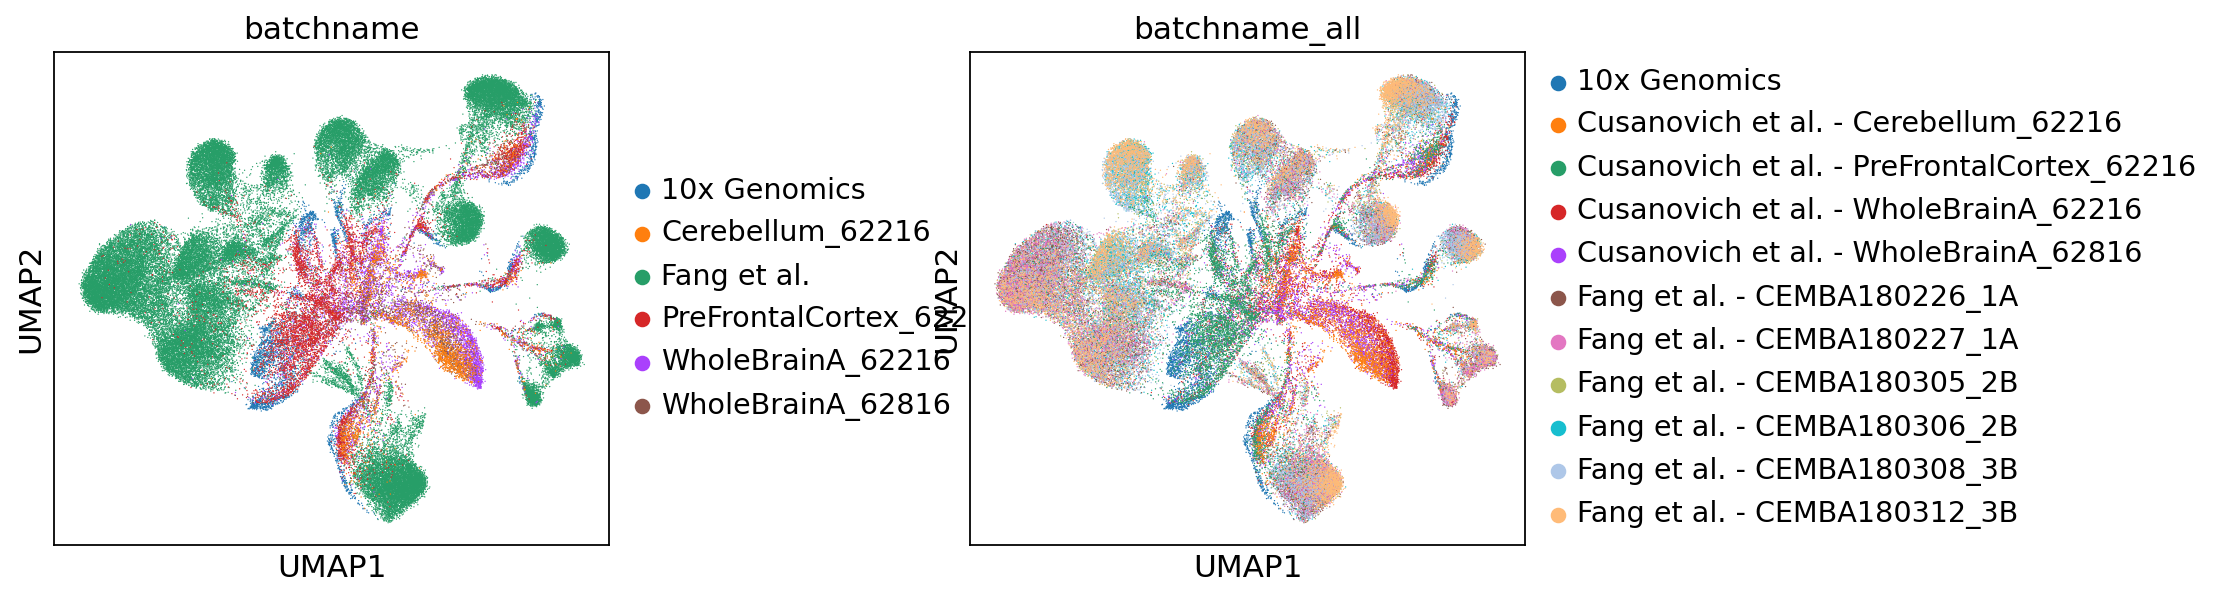

In [9]:
sc.pl.umap(adata_large, color=['batchname', 'batchname_all'], wspace=0.5)

In [11]:
epi.pp.lazy(adata)

... storing 'annot_10x' as categorical


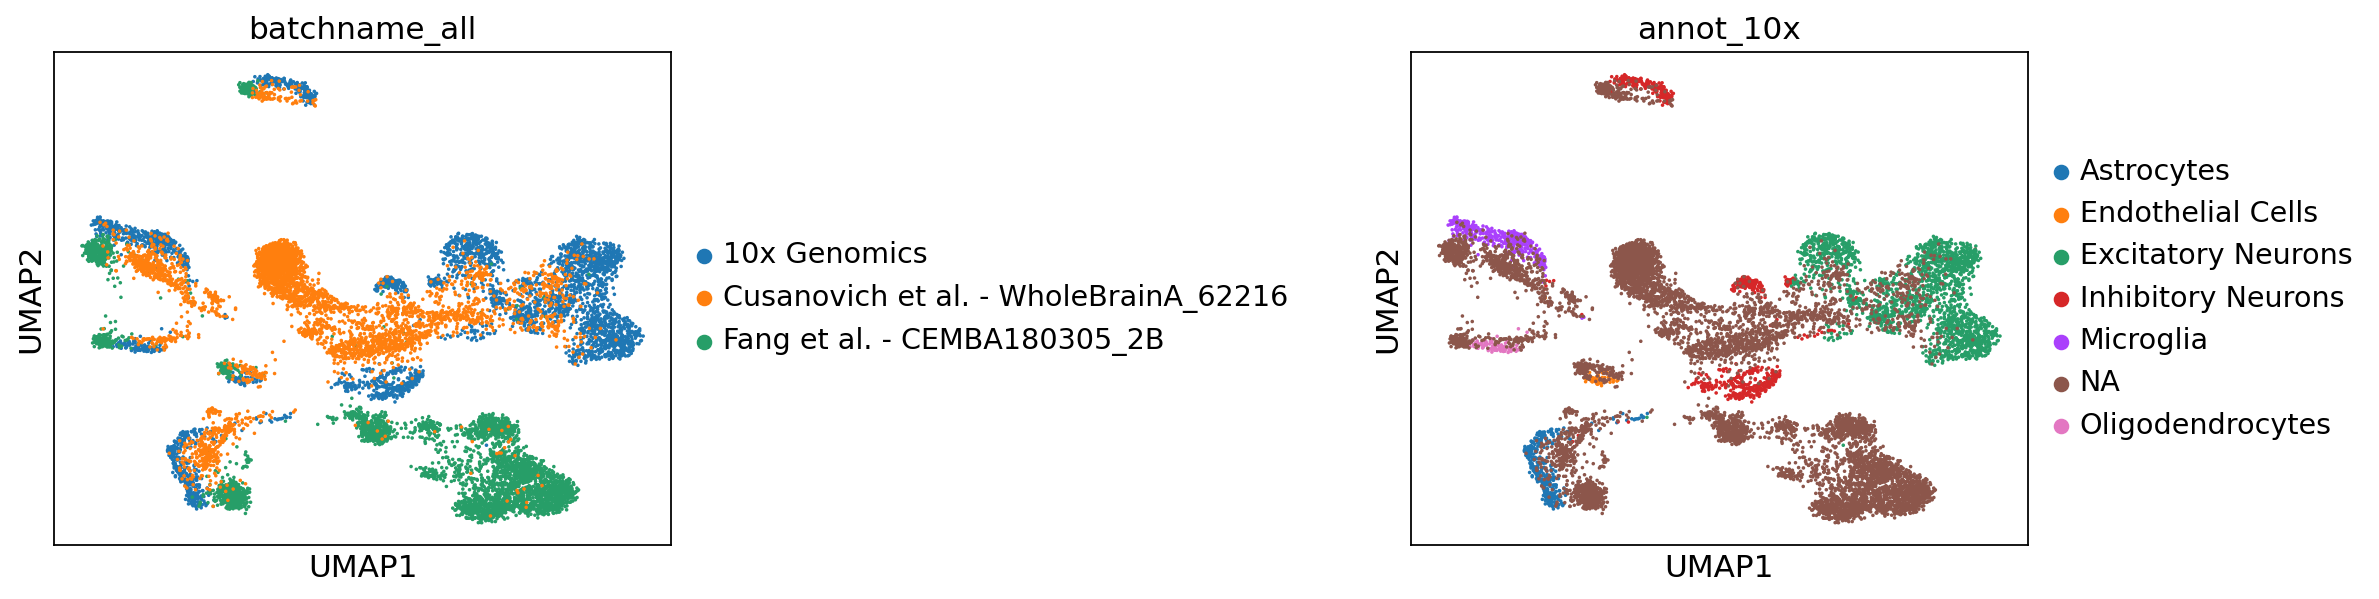

In [12]:
index = 0
annot_10x = {}
for cell in adata_large.obs_names.tolist():
    if adata_large.obs['batchname_all'][index] == '10x Genomics':
        annot_10x[cell] = adata_large.obs['final_cell_label'][index]
    index += 1

annot = []
for cell in adata.obs_names.tolist():
    if cell in annot_10x.keys():
        annot.append(annot_10x[cell])
    else:
        annot.append('NA')
adata.obs['annot_10x'] = annot 

sc.pl.umap(adata, color=['batchname_all', 'annot_10x'], wspace=1)

... storing 'annot_fang3' as categorical


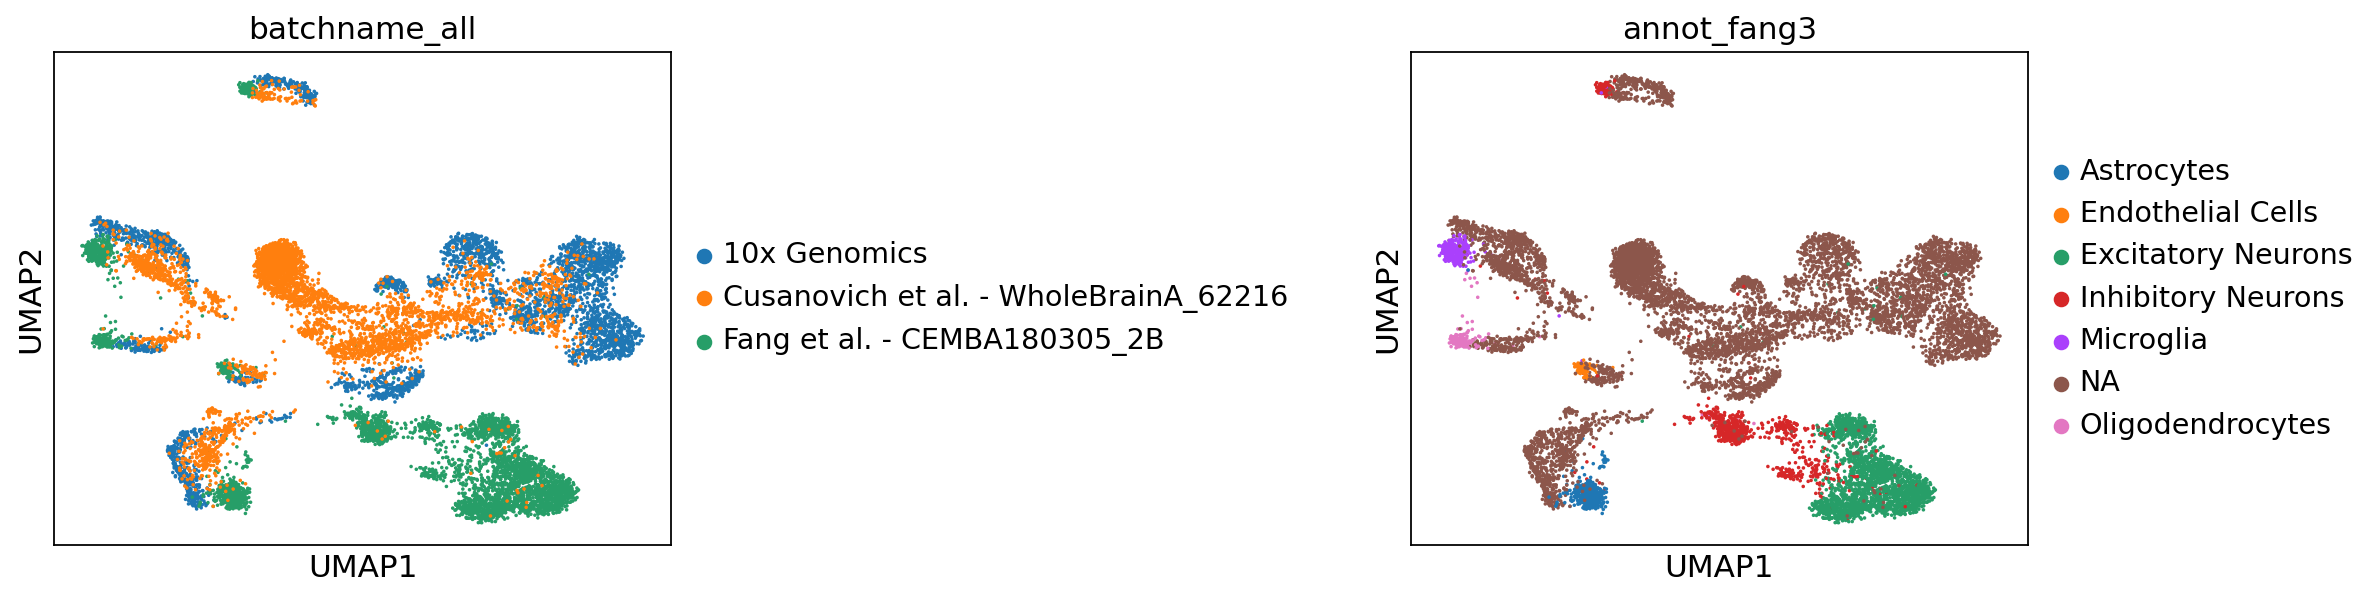

In [25]:
index = 0
annot_fang = {}
for cell in adata_large.obs_names.tolist():
    if adata_large.obs['batchname_all'][index] == 'Fang et al. - CEMBA180305_2B':
        annot_fang[cell.split('-')[0]] = adata_large.obs['final_cell_label'][index]
    index += 1

annot = []
index = 0
for cell in adata.obs_names.tolist():
    if adata.obs['batchname_all'][index] == 'Fang et al. - CEMBA180305_2B':
        if cell.split('-')[0] in annot_fang.keys():
            annot.append(annot_fang[cell.split('-')[0]])
        else:
            annot.append('NA')
    else:
        annot.append('NA')
    index += 1
adata.obs['annot_fang3'] = annot 

sc.pl.umap(adata, color=['batchname_all', 'annot_fang3'], wspace=1)



... storing 'annot_cus3' as categorical


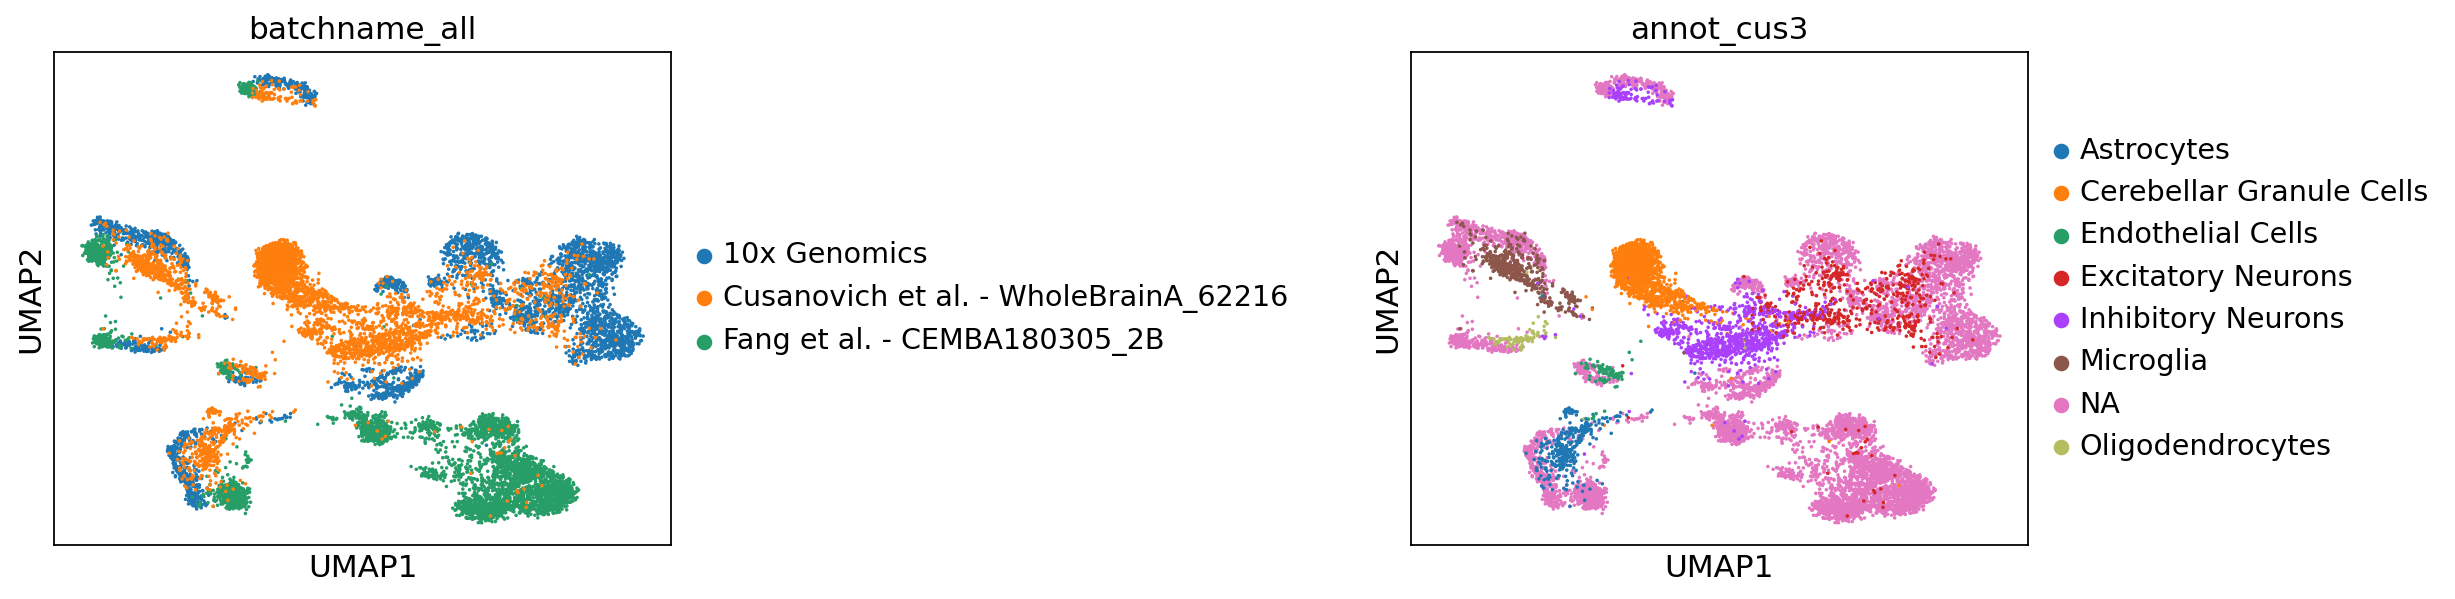

In [22]:
index = 0
annot_cus = {}
for cell in adata_large.obs_names.tolist():
    if adata_large.obs['batchname_all'][index] == 'Cusanovich et al. - WholeBrainA_62216':
        annot_cus[cell.split('-')[0]] = adata_large.obs['final_cell_label'][index]
    index += 1

annot = []
index = 0
for cell in adata.obs_names.tolist():
    if adata.obs['batchname_all'][index] == 'Cusanovich et al. - WholeBrainA_62216':
        if cell.split('-')[0] in annot_cus.keys():
            annot.append(annot_cus[cell.split('-')[0]])
        else:
            annot.append('NA')
    else:
        annot.append('NA')
    index += 1
adata.obs['annot_cus3'] = annot 

sc.pl.umap(adata, color=['batchname_all', 'annot_cus3'], wspace=1)

In [29]:
pd.crosstab(adata.obs['batchname_all'], adata.obs['all_cell_annot'])

all_cell_annot,Astrocytes,Cerebellar Granule Cells,Endothelial Cells,Excitatory Neurons,Inhibitory Neurons,Microglia,NA,Oligodendrocytes
batchname_all,,,,,,,,
10x Genomics,352,0,60,2032,659,415,1,100
Cusanovich et al. - WholeBrainA_62216,337,1409,80,585,998,491,0,80
Fang et al. - CEMBA180305_2B,404,0,99,2237,798,285,0,176


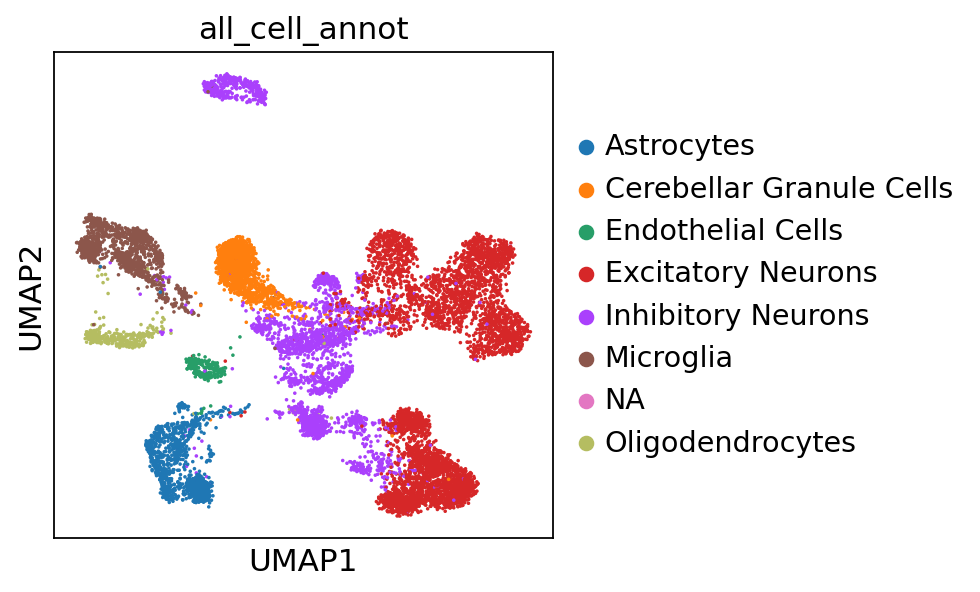

In [30]:
sc.pl.umap(adata, color=['all_cell_annot'])

In [31]:
adata

AnnData object with n_obs × n_vars = 11598 × 94088 
    obs: 'batch', 'batchname', 'filter', 'filter_barcode_cellranger', 'log_nb_features', 'nb_features', 'n_counts', 'batchname_all', 'annot_10x', 'annot_fang', 'annot_fang2', 'annot_fang3', 'annot_fang4', 'annot_fang5', 'annot_fang6', 'annot_cus', 'annot_cus2', 'annot_cus3', 'annot_cus4', 'all_cell_annot'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'
    uns: 'pca', 'neighbors', 'umap', 'batchname_all_colors', 'annot_10x_colors', 'annot_fang_colors', 'annot_fang2_colors', 'annot_fang3_colors', 'annot_fang4_colors', 'annot_fang5_colors', 'annot_fang6_colors', 'annot_cus_colors', 'annot_cus2_colors', 'annot_cus3_colors', 'annot_cus4_colors', 'batchname_colors', 'all_cell_annot_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

In [32]:
adata = adata[adata.obs['all_cell_annot']!='NA',:].copy()
adata

AnnData object with n_obs × n_vars = 11597 × 94088 
    obs: 'batch', 'batchname', 'filter', 'filter_barcode_cellranger', 'log_nb_features', 'nb_features', 'n_counts', 'batchname_all', 'annot_10x', 'annot_fang', 'annot_fang2', 'annot_fang3', 'annot_fang4', 'annot_fang5', 'annot_fang6', 'annot_cus', 'annot_cus2', 'annot_cus3', 'annot_cus4', 'all_cell_annot'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'
    uns: 'pca', 'neighbors', 'umap', 'batchname_all_colors', 'annot_10x_colors', 'annot_fang_colors', 'annot_fang2_colors', 'annot_fang3_colors', 'annot_fang4_colors', 'annot_fang5_colors', 'annot_fang6_colors', 'annot_cus_colors', 'annot_cus2_colors', 'annot_cus3_colors', 'annot_cus4_colors', 'batchname_colors', 'all_cell_annot_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

In [33]:
adata.obs['final_cell_label'] = adata.obs['all_cell_annot'].copy()

In [34]:
del adata.obs['annot_10x'], adata.obs['annot_fang'], adata.obs['annot_fang2'], adata.obs['annot_fang3']
del adata.obs['annot_fang4'], adata.obs['annot_fang5'], adata.obs['annot_fang6'], adata.obs['annot_cus']
del adata.obs['annot_cus2'], adata.obs['annot_cus3'], adata.obs['annot_cus4'], adata.obs['all_cell_annot']

del adata.uns['annot_10x_colors'], adata.uns['annot_fang_colors'], adata.uns['annot_fang2_colors'], adata.uns['annot_fang3_colors']
del adata.uns['annot_fang4_colors'], adata.uns['annot_fang5_colors'], adata.uns['annot_fang6_colors'], adata.uns['annot_cus_colors']
del adata.uns['annot_cus2_colors'], adata.uns['annot_cus3_colors'], adata.uns['annot_cus4_colors'], adata.uns['all_cell_annot_colors']

In [35]:
adata

AnnData object with n_obs × n_vars = 11597 × 94088 
    obs: 'batch', 'batchname', 'filter', 'filter_barcode_cellranger', 'log_nb_features', 'nb_features', 'n_counts', 'batchname_all', 'final_cell_label'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'
    uns: 'pca', 'neighbors', 'umap', 'batchname_all_colors', 'batchname_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [36]:
epi.pp.lazy(adata)

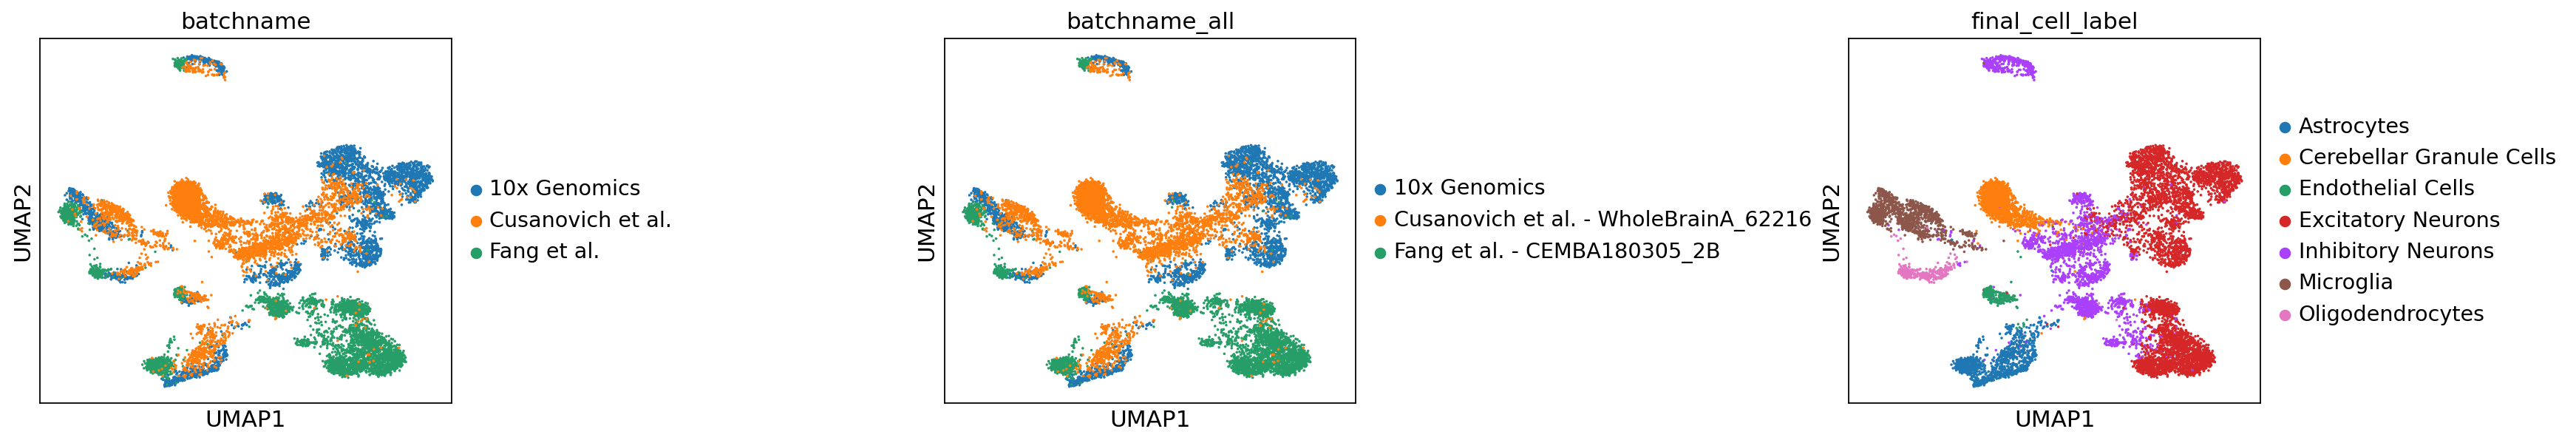

In [37]:
sc.pl.umap(adata, color=['batchname', 'batchname_all', 'final_cell_label'], wspace=1)

In [38]:
adata.write('./integration_resubmission/small_peaks_dataset_merged_dataset_cell_label.h5ad')